# ✅ Correct imports
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from ads.common.model import ADSModel
from ads.common.data import ADSData
from ads.evaluations.evaluator import ADSEvaluator

# ------------------------------------------------------------
# 1️⃣ Generate sample classification data
# ------------------------------------------------------------
seed = 42
X, y = make_classification(
    n_samples=10000,
    n_features=25,
    n_classes=2,
    flip_y=0.1,
    random_state=seed
)

# Split into training and testing sets
trainx, testx, trainy, testy = train_test_split(
    X, y, test_size=0.30, random_state=seed
)

# ------------------------------------------------------------
# 2️⃣ Train models
# ------------------------------------------------------------
lr_clf = LogisticRegression(
    random_state=0,
    solver="lbfgs",
    multi_class="multinomial"
).fit(trainx, trainy)

rf_clf = RandomForestClassifier(n_estimators=50, random_state=seed).fit(trainx, trainy)

# ------------------------------------------------------------
# 3️⃣ Wrap models for ADS
# ------------------------------------------------------------
bin_lr_model = ADSModel.from_estimator(lr_clf, classes=[0, 1])
bin_rf_model = ADSModel.from_estimator(rf_clf, classes=[0, 1])

# ------------------------------------------------------------
# 4️⃣ Evaluate with ADS Evaluator
# ------------------------------------------------------------
evaluator = ADSEvaluator(
    ADSData(testx, testy),
    models=[bin_lr_model, bin_rf_model],
    training_data=ADSData(trainx, trainy),
)

# ------------------------------------------------------------
# 5️⃣ Show results
# ------------------------------------------------------------
print("\n✅ Evaluation Metrics:")
#print(evaluator.metrics)
metrics_df = evaluator.metrics
# ✅ Access metrics safely (no display)
metrics = evaluator.metrics
if hasattr(metrics, "to_pandas"):
    metrics_df = metrics.to_pandas()
else:
    metrics_df = metrics

# ✅ This will not call ADS' internal __repr__
import pandas as pd
pd.set_option("display.max_columns", None)
print(metrics_df)



✅ Model Evaluation Results:

+---------------------+----------+-----------+--------+----------+---------+
|        Model        | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
+---------------------+----------+-----------+--------+----------+---------+
| Logistic Regression |  0.7847  |  0.7948   | 0.7616 |  0.7779  | 0.8596  |
|    Random Forest    |  0.8793  |  0.8974   | 0.8539 |  0.8751  | 0.9295  |
+---------------------+----------+-----------+--------+----------+---------+


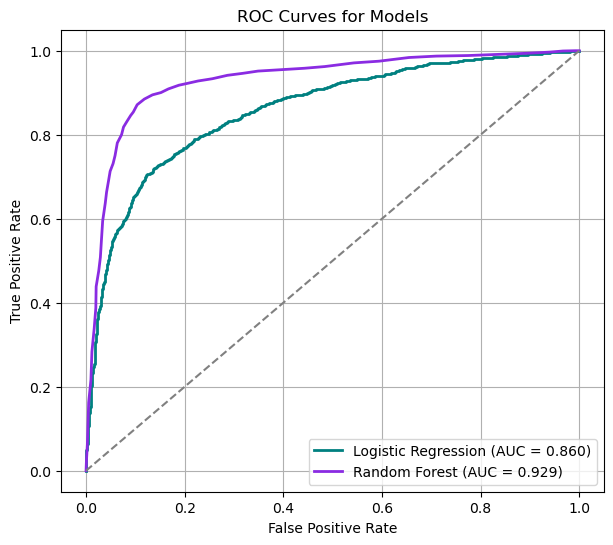

In [1]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate  # for pretty table output

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

from ads.common.model import ADSModel
from ads.common.data import ADSData
from ads.evaluations.evaluator import ADSEvaluator


# --- Step 1: Generate synthetic binary classification data ---
seed = 42
X, y = make_classification(
    n_samples=10000,
    n_features=25,
    n_informative=10,
    n_classes=2,
    flip_y=0.1,
    random_state=seed
)

# --- Step 2: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

# --- Step 3: Train models ---
lr_clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=seed)

lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# --- Step 4: Wrap models with ADSModel (for completeness) ---
bin_lr_model = ADSModel.from_estimator(lr_clf, classes=[0, 1])
bin_rf_model = ADSModel.from_estimator(rf_clf, classes=[0, 1])

# --- Step 5: Create evaluator (optional for future compatibility) ---
evaluator = ADSEvaluator(
    ADSData(X_test, y_test),
    models=[bin_lr_model, bin_rf_model],
    training_data=ADSData(X_train, y_train),
)

# --- Step 6: Manual Evaluation ---
models = {
    "Logistic Regression": lr_clf,
    "Random Forest": rf_clf
}

rows = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]

    rows.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4),
        "ROC-AUC": round(roc_auc_score(y_test, y_score), 4)
    })

results_df = pd.DataFrame(rows)

# --- Step 7: Print results nicely ---
print("\n✅ Model Evaluation Results:\n")
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

# --- Step 8: Plot ROC Curves ---
plt.figure(figsize=(7, 6))
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



✅ Evaluation Metrics:

                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression    0.7847     0.7948  0.7616    0.7779   0.8596
1        Random Forest    0.8793     0.8974  0.8539    0.8751   0.9295


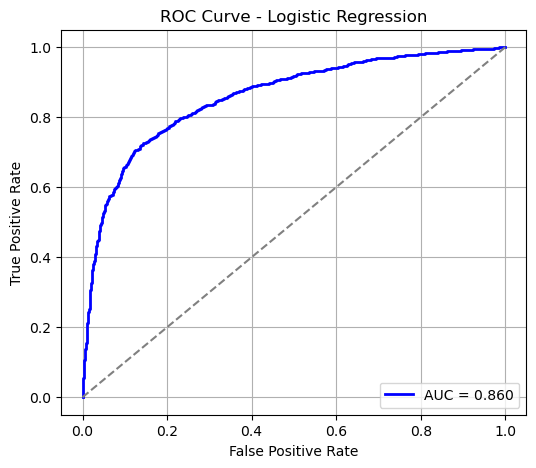

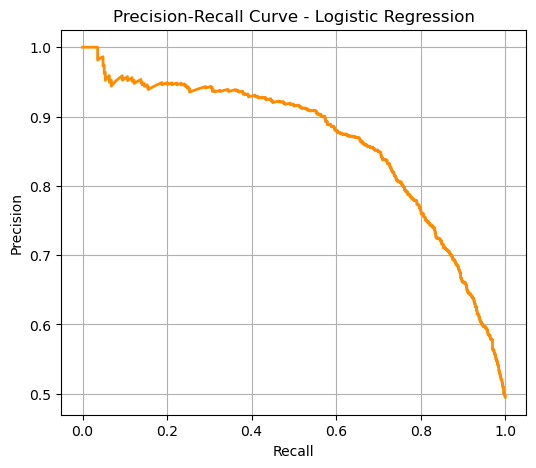

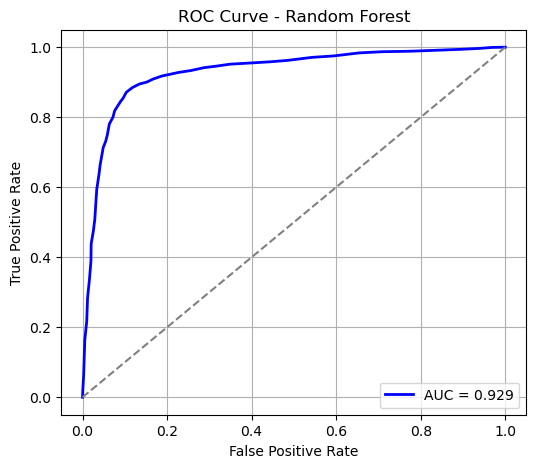

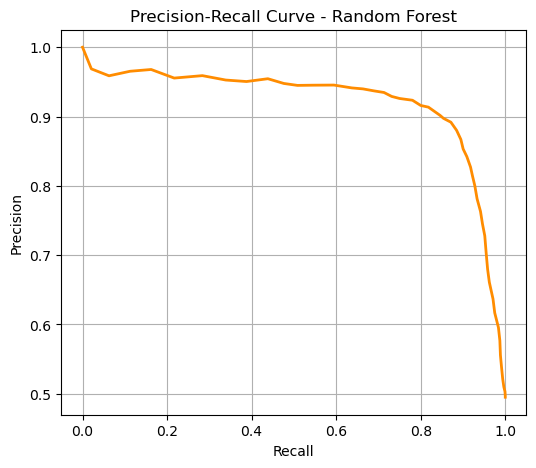

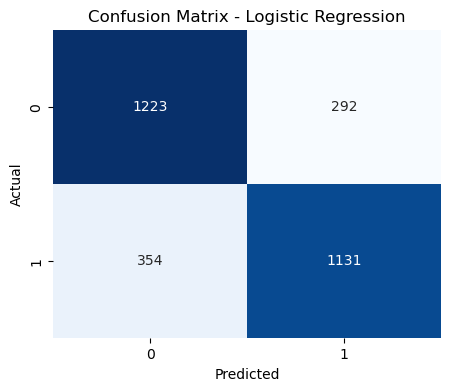

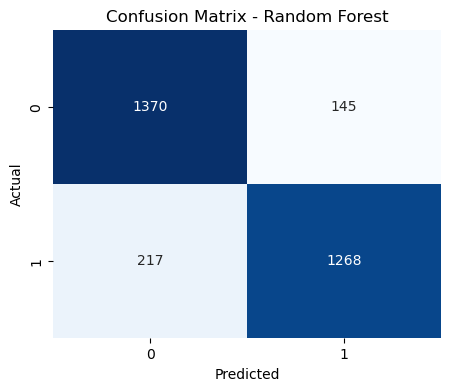

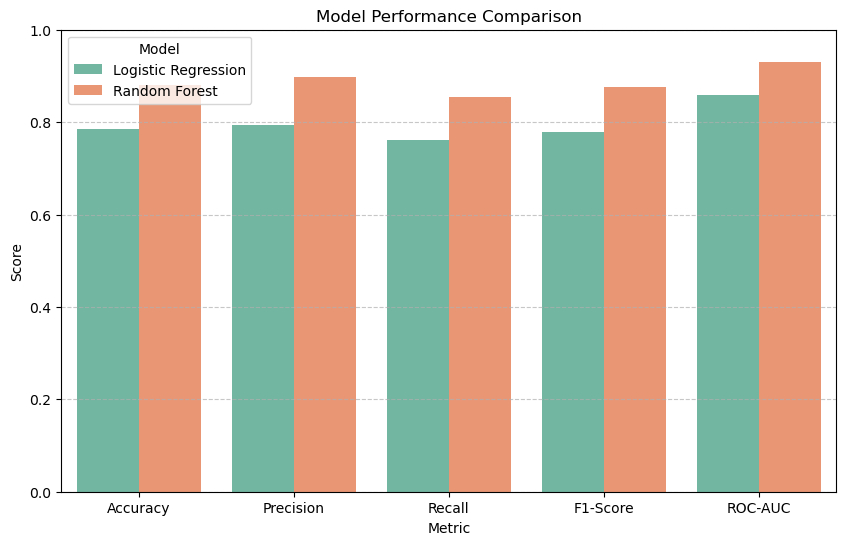

In [2]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, precision_recall_curve,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# --- Step 1: Generate synthetic dataset ---
seed = 42
X, y = make_classification(
    n_samples=10000,
    n_features=25,
    n_informative=10,
    n_classes=2,
    flip_y=0.1,
    random_state=seed
)

# --- Step 2: Split into train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

# --- Step 3: Train models ---
lr_clf = LogisticRegression(random_state=seed, solver='lbfgs', max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=seed)

lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

models = {
    "Logistic Regression": lr_clf,
    "Random Forest": rf_clf
}

# --- Step 4: Evaluate models ---
metrics_list = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]

    metrics_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_score)
    })

# --- Step 5: Display metrics table ---
results_df = pd.DataFrame(metrics_list)
print("\n✅ Evaluation Metrics:\n")
print(results_df.round(4))

# --- Step 6: Individual ROC and PR Curves ---
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color="darkorange", lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.grid(True)
    plt.show()

# --- Step 7: Confusion Matrices ---
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Step 8: Combined Bar Chart of All Metrics ---
metrics_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_melted, palette="Set2")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()
